<a href="https://colab.research.google.com/github/kchopra456/ml-model-template/blob/master/02.0.6-ml-twotower-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# hack - https://github.com/googlecolab/colabtools/issues/3409#issuecomment-1446281277
import locale
locale.getpreferredencoding = lambda: "UTF-8"
! pip install -Uq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [3]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
%cd rapidsai-csp-utils
!git checkout 22.12-patch
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 1.98 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/rapidsai-csp-utils
Branch '22.12-patch' set up to track remote branch '22.12-patch' from 'origin'.
Switched to a new branch '22.12-patch'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 26, in <module>
    gpu_name = pynvml.nvmlDeviceGetName(pynvml.nvmlDeviceGetHandleByIndex(0)).decode('UTF-8')
AttributeError: 'str' object has no attribute 'decode'. Did you mean: 'encode'?
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 26, in <module>
    gpu_name =

In [4]:
%%bash
# Install the Merlin Framework
pip install -Uq git+https://github.com/NVIDIA-Merlin/models.git@release-23.06
pip install -Uq git+https://github.com/NVIDIA-Merlin/nvtabular.git@release-23.06
pip install -Uq git+https://github.com/NVIDIA-Merlin/core.git@release-23.06
# pip install -Uq git+https://github.com/NVIDIA-Merlin/system.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/dataloader.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git@release-23.06
# pip install -Uq xgboost lightfm implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.5/985.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Load Data
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/02-Merlin-Models-and-NVTabular-integration.ipynb

In [1]:
import logging
import warnings

# Set the logging level to a higher value (e.g., CRITICAL)
logging.basicConfig(level=logging.ERROR)

warnings.filterwarnings("ignore")

In [2]:
import os
import shutil
import numpy as np
from nvtabular import ops
from merlin.schema.tags import Tags
import merlin.io
import merlin.models.tf as mm

import nvtabular as nvt
import tensorflow as tf


from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()

In [3]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

GIT_PROJECT = 'kchopra456/ml-model-template'

In [4]:
import glob

USE_AUGMENTED_DATASET= False
DATA_VERSION = 'v4'

_TRAIN,_VALID,_TEST = ('train_aug', 'valid_aug', 'test_aug') if USE_AUGMENTED_DATASET else ('train', 'valid', 'test')

TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN + f'_{DATA_VERSION}', "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID + f'_{DATA_VERSION}', "*.parquet")))
TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST + f'_{DATA_VERSION}', "*.parquet")))

# TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN , "*.parquet")))
# VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID , "*.parquet")))
# TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST , "*.parquet")))
TRAIN_PATHS, VALID_PATHS, TEST_PATHS

(['/content/drive/MyDrive/ml-twotower-model/data/train_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/valid_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/test_v4/part_0.parquet'])

In [5]:
train = merlin.io.Dataset(
    TRAIN_PATHS, engine="parquet"
)
valid = merlin.io.Dataset(
    VALID_PATHS, engine="parquet"
)

In [6]:
schema = train.schema.select_by_tag([
    Tags.ITEM_ID,
    Tags.USER_ID,
    Tags.ITEM,
    Tags.USER,
    # Tags.TARGET,
    ])
schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.freq_threshold,properties.cat_path,properties.start_index,properties.max_size,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,None,102.0,1665.0,0.0,.//categories/unique.movie_id.parquet,0.0,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.ID, Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,74.0,944.0,0.0,.//categories/unique.user_id.parquet,0.0,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,3.0,0.0,.//categories/unique.gender.parquet,0.0,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,22.0,0.0,.//categories/unique.occupation.parquet,0.0,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,None,16.0,20.0,0.0,.//categories/unique.genres.parquet,0.0,0.0,0,19,genres,0.0,NaN


In [7]:
# schema = schema.excluding_by_name('genres')

In [8]:
train.head()

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,226,705,149,1,3,"[5, 13]",1
1,74,144,148,1,3,"[4, 3]",1
2,137,203,295,1,5,[15],1
3,9,300,761,1,3,"[4, 3]",1
4,43,25,212,2,7,[2],1


In [9]:
# missing from load
schema['movie_id'].tags._tags.add(Tags.ITEM_ID)
schema['user_id'].tags._tags.add(Tags.USER_ID)

In [10]:
# select only trainable features and exclude the target
train.schema = schema
valid.schema = schema

In [11]:
train.schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.freq_threshold,properties.cat_path,properties.start_index,properties.max_size,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.ITEM_ID, Tags.CATEGORICAL, Tags...","DType(name='int64', element_type=<ElementType....",False,False,None,102.0,1665.0,0.0,.//categories/unique.movie_id.parquet,0.0,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.ID, Tags.USER_ID, Tags.USER, Tags.CATEGO...","DType(name='int64', element_type=<ElementType....",False,False,None,74.0,944.0,0.0,.//categories/unique.user_id.parquet,0.0,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,3.0,0.0,.//categories/unique.gender.parquet,0.0,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,22.0,0.0,.//categories/unique.occupation.parquet,0.0,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,None,16.0,20.0,0.0,.//categories/unique.genres.parquet,0.0,0.0,0,19,genres,0.0,NaN


In [12]:
assert len(train.schema.select_by_tag(Tags.TARGET).column_names) == 0

## Build Model
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/05-Retrieval-Model.ipynb

### Model definition

In [13]:
# collect model_helper.py
! rm model_helper.py || true
! wget --no-cache https://raw.githubusercontent.com/$GIT_PROJECT/master/model_helper.py #-O model_helper.py

--2023-09-03 11:47:58--  https://raw.githubusercontent.com/kchopra456/ml-model-template/master/model_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10995 (11K) [text/plain]
Saving to: ‘model_helper.py’

model_helper.py     100%[===================>]  10.74K  --.-KB/s    in 0s      

2023-09-03 11:47:58 (97.7 MB/s) - ‘model_helper.py’ saved [10995/10995]



In [14]:
from model_helper import topk_metrics_aggregator
from model_helper import build_towers
from model_helper import default_plot_metrics
from model_helper import plot_metrics
from model_helper import merge_model_history
from model_helper import EvaluationCallback


In [16]:
# only define one time
if 'models' not in globals():
    models = dict()
    historys = dict()
    train_evaluation_clbks = dict()
    valid_evaluation_clbks = dict()
else:
    print('[INFO] skip redefining static variables')

[INFO] skip redefining static variables


### model_v1

In [17]:
VERSION = 'v1'

_tower_dim = [128, 128] # @param

_learning_rate = 0.01 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = _batch_size * 2 # @param
_validation_freq = 5 # @param
_loss = 'categorical_crossentropy' # @param
# _loss = 'bpr-max' # @param

_logq_sampling_correction = False # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [ ]:
if VERSION in models:
    raise RuntimeError('Reusing model version: ', VERSION)

In [19]:
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]

models[VERSION] = model = build_towers(
    train,
    tower_dim=_tower_dim,
    neg_sampler=sampler,
    embedding_dims=embedding_dims,
    logq_sampling_correction=_logq_sampling_correction,
    item_categorical=Tags.CATEGORICAL
)

train_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=train, type_='Train', schema=train.schema)
valid_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation', schema=train.schema)
historys[VERSION] = []

TOP_K = [100, 50, 10]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
    run_eagerly=False,
    metrics=topk_metrics_aggregator(TOP_K),
    loss=_loss,
)

#### model

In [20]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

In [ ]:
# %pdb on
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 40s 442ms/step - loss: 7.4656 - auc: 0.6264 - recall_at_100: 0.0734 - mrr_at_100: 0.0060 - ndcg_at_100: 0.0172 - map_at_100: 0.0060 - precision_at_100: 7.3440e-04 - recall_at_50: 0.0377 - mrr_at_50: 0.0055 - ndcg_at_50: 0.0114 - map_at_50: 0.0055 - precision_at_50: 7.5383e-04 - recall_at_10: 0.0096 - mrr_at_10: 0.0043 - ndcg_at_10: 0.0055 - map_at_10: 0.0043 - precision_at_10: 9.5819e-04 - regularization_loss: 0.0000e+00 - loss_batch: 7.3961
Epoch 2/50
35/35 [==============================] - 14s 334ms/step - loss: 7.1980 - auc: 0.7195 - recall_at_100: 0.1637 - mrr_at_100: 0.0120 - ndcg_at_100: 0.0377 - map_at_100: 0.0120 - precision_at_100: 0.0016 - recall_at_50: 0.0931 - mrr_at_50: 0.0111 - ndcg_at_50: 0.0263 - map_at_50: 0.0111 - precision_at_50: 0.0019 - recall_at_10: 0.0228 - mrr_at_10: 0.0082 - ndcg_at_10: 0.0116 - map_at_10: 0.0082 - precision_at_10: 0.0023 - regularization_loss: 0.0000e+00 - loss_batch: 7.1323
Epoch 3/50
35/35

69/69 [==============================] - 5s 18ms/step - loss: 1.4116 - auc: 0.4351 - recall_at_100: 0.3040 - mrr_at_100: 0.0194 - ndcg_at_100: 0.0677 - map_at_100: 0.0194 - precision_at_100: 0.0030 - recall_at_10: 0.0402 - mrr_at_10: 0.0122 - ndcg_at_10: 0.0186 - map_at_10: 0.0122 - precision_at_10: 0.0040 - regularization_loss: 0.0000e+00 - loss_batch: 1.4201
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.4115986824035645, 'auc': 0.4350752830505371, 'recall_at_100': 0.30534741282463074, 'mrr_at_100': 0.019562624394893646, 'ndcg_at_100': 0.06809685379266739, 'map_at_100': 0.019562624394893646, 'precision_at_100': 0.0030534740071743727, 'recall_at_10': 0.0409105159342289, 'mrr_at_10': 0.01234481856226921, 'ndcg_at_10': 0.018875306472182274, 'map_at_10': 0.01234481856226921, 'precision_at_10': 0.004091051407158375, 'regularization_loss': 0.0, 'loss_batch': 1.8250550031661987, 'coverage': 1.0, 'novelty': 0.029673683879291358}
Candidate set rows: 1387


15/15 [==============================] - 5s 31ms/step - loss: 0.9392 - auc: 0.4401 - recall_at_100: 0.1936 - mrr_at_100: 0.0082 - ndcg_at_100: 0.0389 - map_at_100: 0.0082 - precision_at_100: 0.0019 - recall_at_10: 0.0156 - mrr_at_10: 0.0037 - ndcg_at_10: 0.0064 - map_at_10: 0.0037 - precision_at_10: 0.0016 - regularization_loss: 0.0000e+00 - loss_batch: 1.0009
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9392317533493042, 'auc': 0.44005346298217773, 'recall_at_100': 0.1994784027338028, 'mrr_at_100': 0.008846620097756386, 'ndcg_at_100': 0.04056026041507721, 'map_at_100': 0.008846620097756386, 'precision_at_100': 0.0019947837572544813, 'recall_at_10': 0.017587266862392426, 'mrr_at_10': 0.004197103902697563, 'ndcg_at_10': 0.007233300246298313, 'map_at_10': 0.004197103902697563, 'precision_at_10': 0.0017587268957868218, 'regularization_loss': 0.0, 'loss_batch': 1.6462594270706177, 'coverage': 1.0, 'novelty': 0.1493743069855853}
35/35 [==============================

69/69 [==============================] - 6s 20ms/step - loss: 1.7418 - auc: 0.4565 - recall_at_100: 0.3702 - mrr_at_100: 0.0268 - ndcg_at_100: 0.0858 - map_at_100: 0.0268 - precision_at_100: 0.0037 - recall_at_10: 0.0564 - mrr_at_10: 0.0179 - ndcg_at_10: 0.0267 - map_at_10: 0.0179 - precision_at_10: 0.0056 - regularization_loss: 0.0000e+00 - loss_batch: 1.7504
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7418057918548584, 'auc': 0.4565114974975586, 'recall_at_100': 0.37496083974838257, 'mrr_at_100': 0.02738080732524395, 'ndcg_at_100': 0.08710438013076782, 'map_at_100': 0.02738080732524395, 'precision_at_100': 0.003749608527868986, 'recall_at_10': 0.058103758841753006, 'mrr_at_10': 0.018377035856246948, 'ndcg_at_10': 0.02748817764222622, 'map_at_10': 0.018377035856246948, 'precision_at_10': 0.005810375325381756, 'regularization_loss': 0.0, 'loss_batch': 2.157590627670288, 'coverage': 1.0, 'novelty': 0.03457505316418567}
Candidate set rows: 1387


15/15 [==============================] - 7s 31ms/step - loss: 0.9556 - auc: 0.4142 - recall_at_100: 0.1934 - mrr_at_100: 0.0076 - ndcg_at_100: 0.0382 - map_at_100: 0.0076 - precision_at_100: 0.0019 - recall_at_10: 0.0128 - mrr_at_10: 0.0031 - ndcg_at_10: 0.0053 - map_at_10: 0.0031 - precision_at_10: 0.0013 - regularization_loss: 0.0000e+00 - loss_batch: 1.0039
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9556137919425964, 'auc': 0.4142487943172455, 'recall_at_100': 0.19707101583480835, 'mrr_at_100': 0.007745285052806139, 'ndcg_at_100': 0.038948770612478256, 'map_at_100': 0.007745285052806139, 'precision_at_100': 0.0019707102328538895, 'recall_at_10': 0.013775578700006008, 'mrr_at_10': 0.0031754521187394857, 'ndcg_at_10': 0.005571694113314152, 'map_at_10': 0.0031754521187394857, 'precision_at_10': 0.0013775578700006008, 'regularization_loss': 0.0, 'loss_batch': 1.508647084236145, 'coverage': 1.0, 'novelty': 0.1656129258868985}
35/35 [============================

69/69 [==============================] - 5s 19ms/step - loss: 1.8945 - auc: 0.4890 - recall_at_100: 0.4031 - mrr_at_100: 0.0317 - ndcg_at_100: 0.0957 - map_at_100: 0.0317 - precision_at_100: 0.0040 - recall_at_10: 0.0666 - mrr_at_10: 0.0221 - ndcg_at_10: 0.0323 - map_at_10: 0.0221 - precision_at_10: 0.0067 - regularization_loss: 0.0000e+00 - loss_batch: 1.9056
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8944975137710571, 'auc': 0.4889791011810303, 'recall_at_100': 0.4047320485115051, 'mrr_at_100': 0.032033950090408325, 'ndcg_at_100': 0.09640742838382721, 'map_at_100': 0.032033950090408325, 'precision_at_100': 0.004047319758683443, 'recall_at_10': 0.0681319609284401, 'mrr_at_10': 0.022348662838339806, 'ndcg_at_10': 0.032865218818187714, 'map_at_10': 0.022348662838339806, 'precision_at_10': 0.006813195534050465, 'regularization_loss': 0.0, 'loss_batch': 2.4330897331237793, 'coverage': 0.9980781550288277, 'novelty': 0.03631812054689004}
Candidate set rows: 1387


15/15 [==============================] - 4s 23ms/step - loss: 0.9522 - auc: 0.4398 - recall_at_100: 0.1879 - mrr_at_100: 0.0065 - ndcg_at_100: 0.0362 - map_at_100: 0.0065 - precision_at_100: 0.0019 - recall_at_10: 0.0097 - mrr_at_10: 0.0021 - ndcg_at_10: 0.0039 - map_at_10: 0.0021 - precision_at_10: 9.7130e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9946
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9522467851638794, 'auc': 0.4398205578327179, 'recall_at_100': 0.19098569452762604, 'mrr_at_100': 0.006802073679864407, 'ndcg_at_100': 0.036917462944984436, 'map_at_100': 0.006802073679864407, 'precision_at_100': 0.001909857033751905, 'recall_at_10': 0.009963889606297016, 'mrr_at_10': 0.002372858813032508, 'ndcg_at_10': 0.004091642331331968, 'map_at_10': 0.002372858813032508, 'precision_at_10': 0.0009963888442143798, 'regularization_loss': 0.0, 'loss_batch': 1.4373327493667603, 'coverage': 1.0, 'novelty': 0.16821262932572245}
35/35 [=========================

69/69 [==============================] - 5s 28ms/step - loss: 2.0102 - auc: 0.5314 - recall_at_100: 0.4265 - mrr_at_100: 0.0358 - ndcg_at_100: 0.1037 - map_at_100: 0.0358 - precision_at_100: 0.0043 - recall_at_10: 0.0783 - mrr_at_10: 0.0256 - ndcg_at_10: 0.0377 - map_at_10: 0.0256 - precision_at_10: 0.0078 - regularization_loss: 0.0000e+00 - loss_batch: 2.0242
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0101916790008545, 'auc': 0.5314323306083679, 'recall_at_100': 0.4294179677963257, 'mrr_at_100': 0.03636771813035011, 'ndcg_at_100': 0.10476049035787582, 'map_at_100': 0.03636771813035011, 'precision_at_100': 0.004294179379940033, 'recall_at_10': 0.07905757427215576, 'mrr_at_10': 0.02606891095638275, 'ndcg_at_10': 0.03823750093579292, 'map_at_10': 0.02606891095638275, 'precision_at_10': 0.007905757986009121, 'regularization_loss': 0.0, 'loss_batch': 2.6882760524749756, 'coverage': 0.9987187700192185, 'novelty': 0.03550184474060688}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.9366 - auc: 0.4565 - recall_at_100: 0.1744 - mrr_at_100: 0.0057 - ndcg_at_100: 0.0332 - map_at_100: 0.0057 - precision_at_100: 0.0017 - recall_at_10: 0.0077 - mrr_at_10: 0.0017 - ndcg_at_10: 0.0030 - map_at_10: 0.0017 - precision_at_10: 7.6503e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9850
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9366077184677124, 'auc': 0.4564875364303589, 'recall_at_100': 0.18456600606441498, 'mrr_at_100': 0.006197926122695208, 'ndcg_at_100': 0.03526155650615692, 'map_at_100': 0.006197926122695208, 'precision_at_100': 0.0018456598045304418, 'recall_at_10': 0.00936204381287098, 'mrr_at_10': 0.0019779177382588387, 'ndcg_at_10': 0.003645944409072399, 'map_at_10': 0.0019779177382588387, 'precision_at_10': 0.000936204451136291, 'regularization_loss': 0.0, 'loss_batch': 1.491289734840393, 'coverage': 0.9992790194664743, 'novelty': 0.16289514596648816}
35/35 [===========

69/69 [==============================] - 6s 18ms/step - loss: 2.0419 - auc: 0.5541 - recall_at_100: 0.4350 - mrr_at_100: 0.0381 - ndcg_at_100: 0.1075 - map_at_100: 0.0381 - precision_at_100: 0.0043 - recall_at_10: 0.0847 - mrr_at_10: 0.0276 - ndcg_at_10: 0.0407 - map_at_10: 0.0276 - precision_at_10: 0.0085 - regularization_loss: 0.0000e+00 - loss_batch: 2.0560
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.041949510574341, 'auc': 0.5540745854377747, 'recall_at_100': 0.43327826261520386, 'mrr_at_100': 0.03812464326620102, 'ndcg_at_100': 0.10728941112756729, 'map_at_100': 0.03812464326620102, 'precision_at_100': 0.00433278176933527, 'recall_at_10': 0.08434232324361801, 'mrr_at_10': 0.027662569656968117, 'ndcg_at_10': 0.040684279054403305, 'map_at_10': 0.027662569656968117, 'precision_at_10': 0.008434231393039227, 'regularization_loss': 0.0, 'loss_batch': 2.725172281265259, 'coverage': 0.9993593850096092, 'novelty': 0.04279361045561808}
Candidate set rows: 1387


15/15 [==============================] - 4s 20ms/step - loss: 0.9576 - auc: 0.4860 - recall_at_100: 0.1808 - mrr_at_100: 0.0056 - ndcg_at_100: 0.0341 - map_at_100: 0.0056 - precision_at_100: 0.0018 - recall_at_10: 0.0075 - mrr_at_10: 0.0014 - ndcg_at_10: 0.0028 - map_at_10: 0.0014 - precision_at_10: 7.5134e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0057
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9575940370559692, 'auc': 0.48598650097846985, 'recall_at_100': 0.18556907773017883, 'mrr_at_100': 0.005777826067060232, 'ndcg_at_100': 0.035042621195316315, 'map_at_100': 0.005777826067060232, 'precision_at_100': 0.0018556907307356596, 'recall_at_10': 0.007422762922942638, 'mrr_at_10': 0.0014531866181641817, 'ndcg_at_10': 0.0027952820528298616, 'map_at_10': 0.0014531866181641817, 'precision_at_10': 0.0007422762573696673, 'regularization_loss': 0.0, 'loss_batch': 1.509317398071289, 'coverage': 1.0, 'novelty': 0.17914133738601823}
35/35 [=====================

#### analysis

In [58]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

Plot for model v10


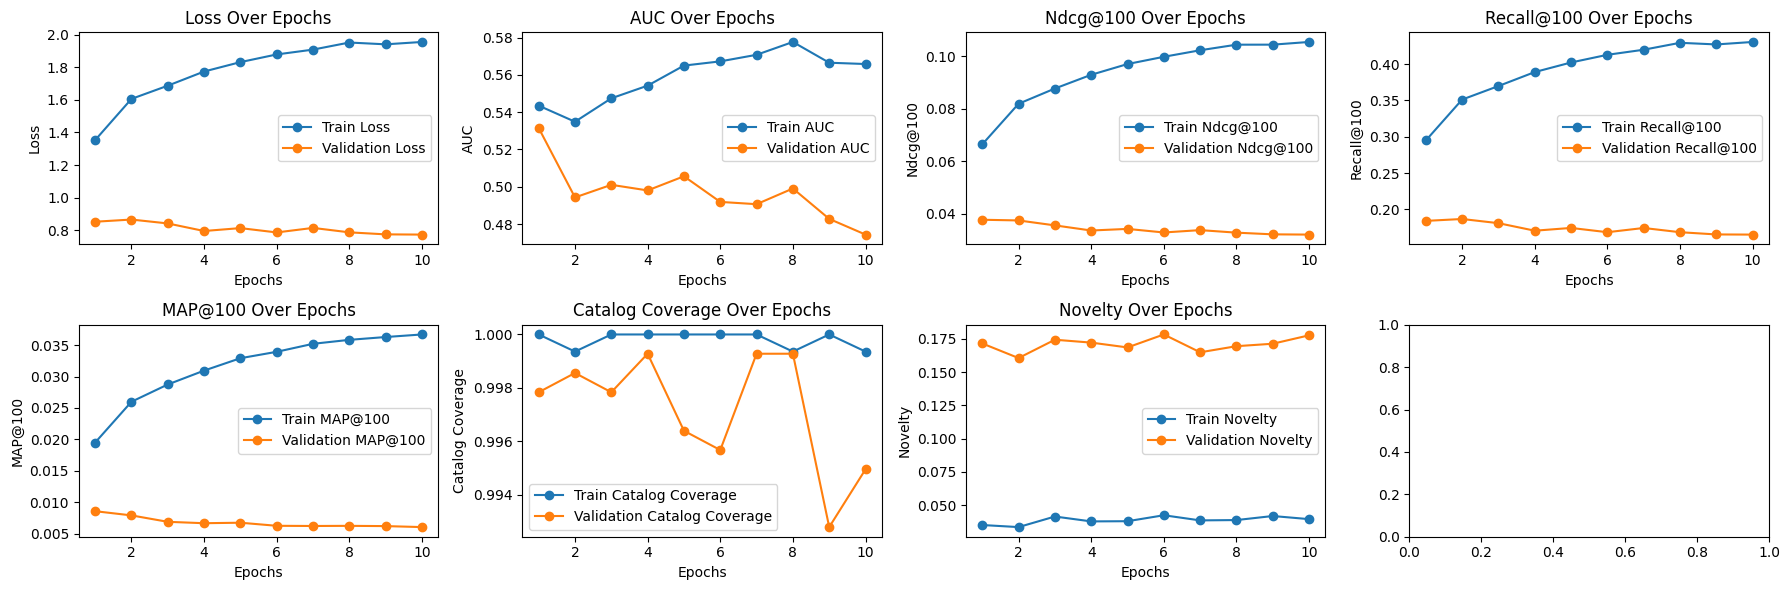

In [59]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


Plot for model v10


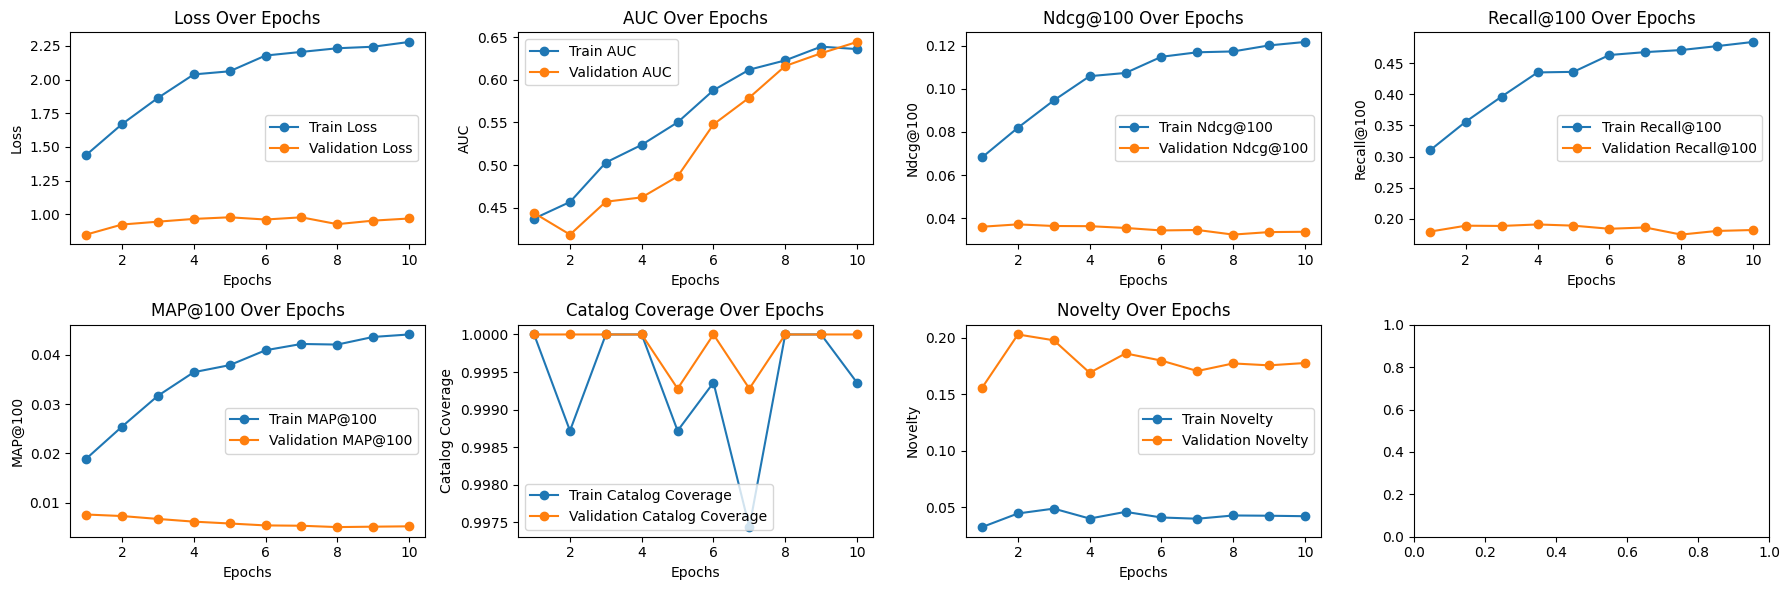

In [24]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


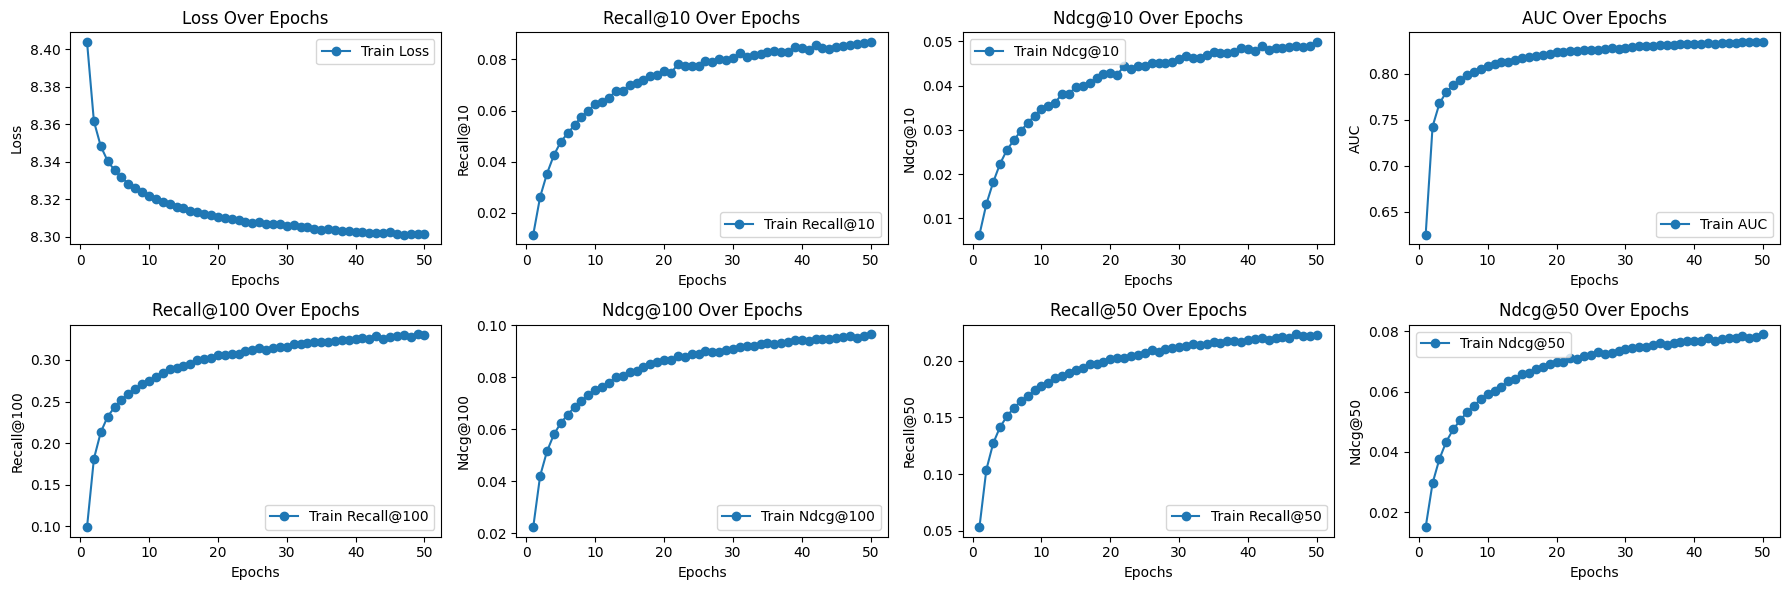

In [51]:
_history = merge_model_history(*history)
# AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': 'auc', **METRIC_AT,})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}